<h1>Polynomial Regression</h1>

## Polynomial Regression

Terkadang tren data tidak selalu terlihat lurus atau linear melainkan melengkung. Dalam kasus seperti ini, menggunakan __Polynomial Regression__. Dengan <i>polynomial regression</i> kita dapat menyesuaikan garis dengan bentuk kumpulan data, misalnya dengan pangkat 2, pangkat 3, 4, dan seterusnya.

Pada intinya, <i>polynomial regression</i> adalah dimana hubungan variabel bebas $x$ dan variabel terikat/independen $y$ dimodelkan sebagai polinomial derajat ke-n pada $x$. Misalnya untuk regresi polinomial dengan derajat 2 (degree = 2), formulanya seperti di bawah ini.
<br><br>
$$y = b + \theta_1  x + \theta_2 x^2$$
<br><br>
Di Scikit-Learn <i>function</i> <code>PolynomialFeatures()</code> digunakan untuk mentransformasi nilai pada fitur menjadi derajat kurang dari atau sesuai dengan yang ditentukan.

## Dataset

Dataset <a href='https://www.kaggle.com/sarita19/fuel-consumption'>Fuel Consumption</a> yang bertujuan untuk memprediksi emisi CO2 untuk kendaraan ringan baru untuk penjualan di Kanada.

__Dataset Information:__

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<i>load</i> dataset ke dalam dataframe Pandas.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset

df = pd.read_csv('fuel-consumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Analisis dan visualisasi data

In [5]:
# Menampilkan deskripsi statistik

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# Jumlah data untuk tiap kendaraan

df['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

melihat nilai unik pada kolom <code>MODEL</code> dengan <code>unique()</code>.

In [7]:
# Melihat nilai unik pada kolom 'MODEL'

df['MODEL'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [8]:
# Menampilkan nilai unik di kolom 'VEHICLECLASS'

df['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


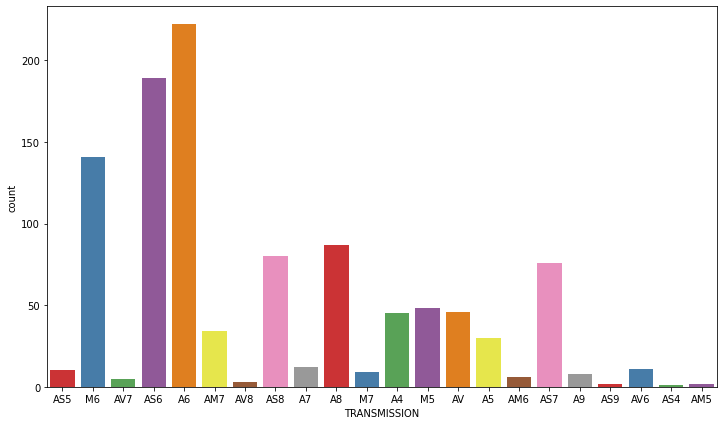

In [9]:
# Countplot untuk kolom 'TRANSMISSION'

plt.figure(figsize=(12,7))
sns.countplot(df['TRANSMISSION'], palette='Set1')

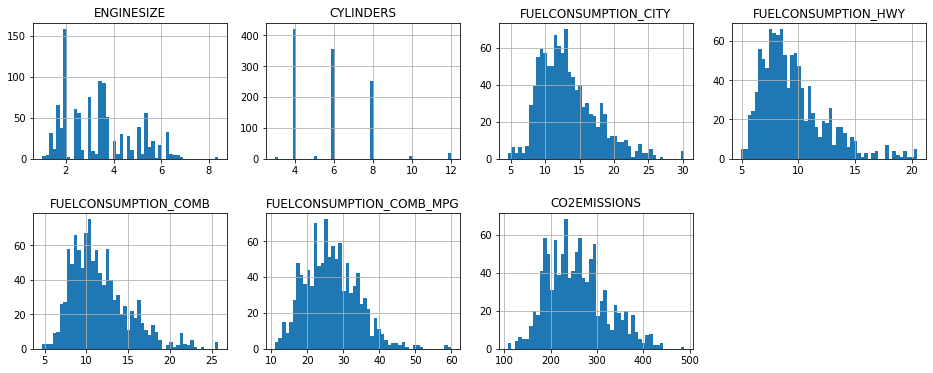

In [10]:
# Menampilkan histogram dari kolom fitur numerik

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(16, 6)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[0,3]) 
ax4 = fig.add_subplot(ax[1,0])  
ax5 = fig.add_subplot(ax[1,1]) 
ax6 = fig.add_subplot(ax[1,2])    

df.hist(column='ENGINESIZE', bins=50, ax=ax0)
df.hist(column='CYLINDERS', bins=50, ax=ax1)
df.hist(column='FUELCONSUMPTION_CITY', bins=50, ax=ax2)
df.hist(column='FUELCONSUMPTION_HWY', bins=50, ax=ax3)
df.hist(column='FUELCONSUMPTION_COMB', bins=50, ax=ax4)
df.hist(column='FUELCONSUMPTION_COMB_MPG', bins=50, ax=ax5)
df.hist(column='CO2EMISSIONS', bins=50, ax=ax6)

ax[1,3].set_axis_off()

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

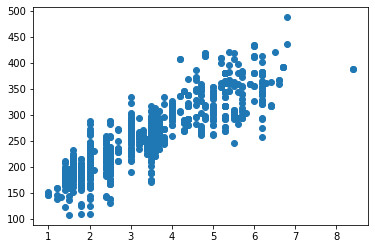

In [11]:
# Scatter plot untuk kolom 'ENGINESIZE' DAN 'CO2EMISSIONS'

plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.show()

## Data Preparation / Preprocessing

### Membagi data train dan test

membagi dataset menjadi data <i>train</i> dan <i>test</i>.

In [12]:
np.random.seed(42)
split = np.random.rand(len(df)) < 0.75
train = df[split]
test = df[~split]

Menggunakan satu fitur yaitu <code>ENGINESIZE</code> untuk pemodelan dengan <i>polynomial regression</i>. Definisikan <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, dan <code>y_test</code>.

In [13]:
# Mendefinisikan X_train, y_train, X_test, dan y_test

X_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

X_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

# Modeling

### Linear regression dengan bentuk polinomial

Untuk membentuk model <i>polynomial regression</i>, gunakan <i>package</i> <code>PolynomialFeatures</code> dari <code>sklearn.preprocessing</code>, kemudian men-<i>train</i>-nya menggunakan data <i>train</i>.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

aplikasikan <code>X_train_poly</code> sebagai data <i>train</i> yang akan dilatih dengan <code>LinearRegression()</code>.

In [15]:
from sklearn import linear_model

poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Coefficient dan Intercept
print ('Coefficients: ', poly_model.coef_)
print ('Intercept: ', poly_model.intercept_)

Coefficients:  [[ 0.         48.3348182  -1.19999087]]
Intercept:  [109.96819396]


### Visualisasi polynomial regression

Text(0, 0.5, 'Emission')

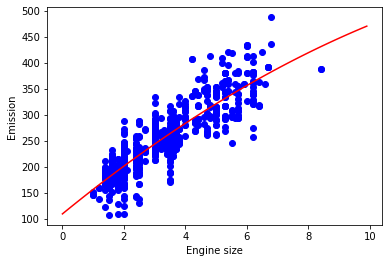

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = poly_model.intercept_[0]+ poly_model.coef_[0][1]*XX+ poly_model.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel('Engine size')
plt.ylabel('Emission')

Terlihat bahwa garis yang terbentuk tidak lurus, melainkan agak melengkung.

### Prediksi dan Evaluasi

uji dan mengevaluasi hasilnya dengan <code>r2_score</code>, <code>mean_absolute_error</code>, dan <code>mean_squared_error</code>.

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi
X_test_poly = poly.fit_transform(X_test)
y_pred = poly_model.predict(X_test_poly)

# Evaluasi
print("R2-score: %.2f" % r2_score(y_pred, y_test))
print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(y_pred, y_test))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(y_pred, y_test))

R2-score: 0.72
Mean Absolute Error (MAE): 23.13
Mean Squared Error (MSE): 912.03




---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


